# Data understanding

I just put in this notebook the plots before doing any kind of preprocessing, as it is required for the first assignment. As the first point requires to do data understanding without modifying the dataset, please let's put the unmodified things in here

## Cyclists plots

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cyclist_df = pd.read_csv("./dataset/cyclists.csv")

Text(0.5, 1.0, 'Distribution of Birth Years')

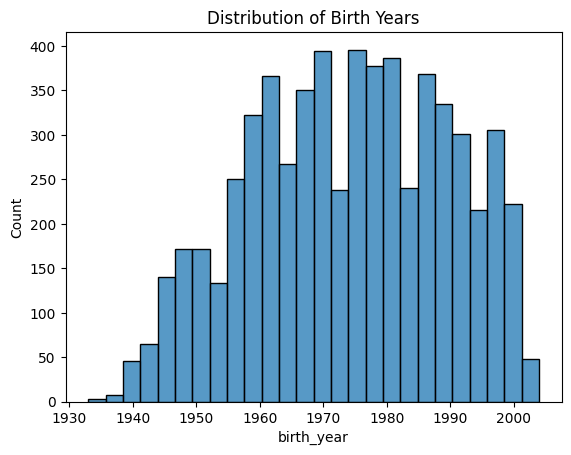

In [6]:
# plot the distribution of birth years
sns.histplot(cyclist_df.birth_year)
plt.title("Distribution of Birth Years")

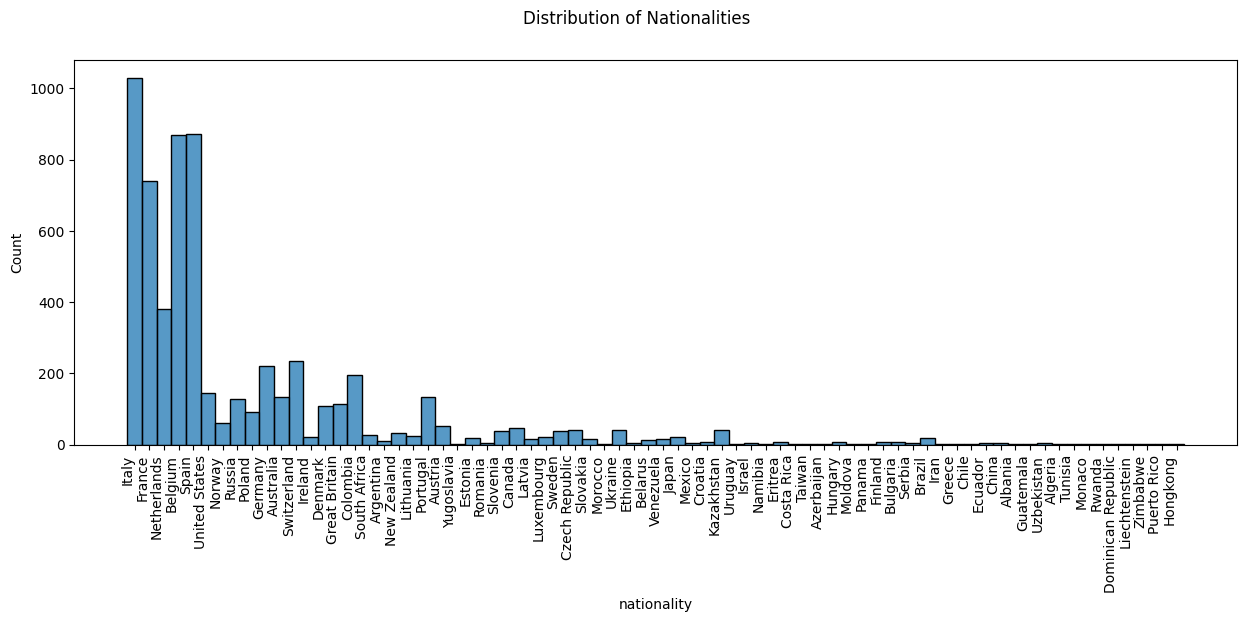

In [7]:
# plot distribution of nationalities
plt.figure(figsize=(15, 5))
sns.histplot(cyclist_df.nationality)
plt.xticks(rotation=90, ha="right")
plt.suptitle("Distribution of Nationalities")
plt.show()

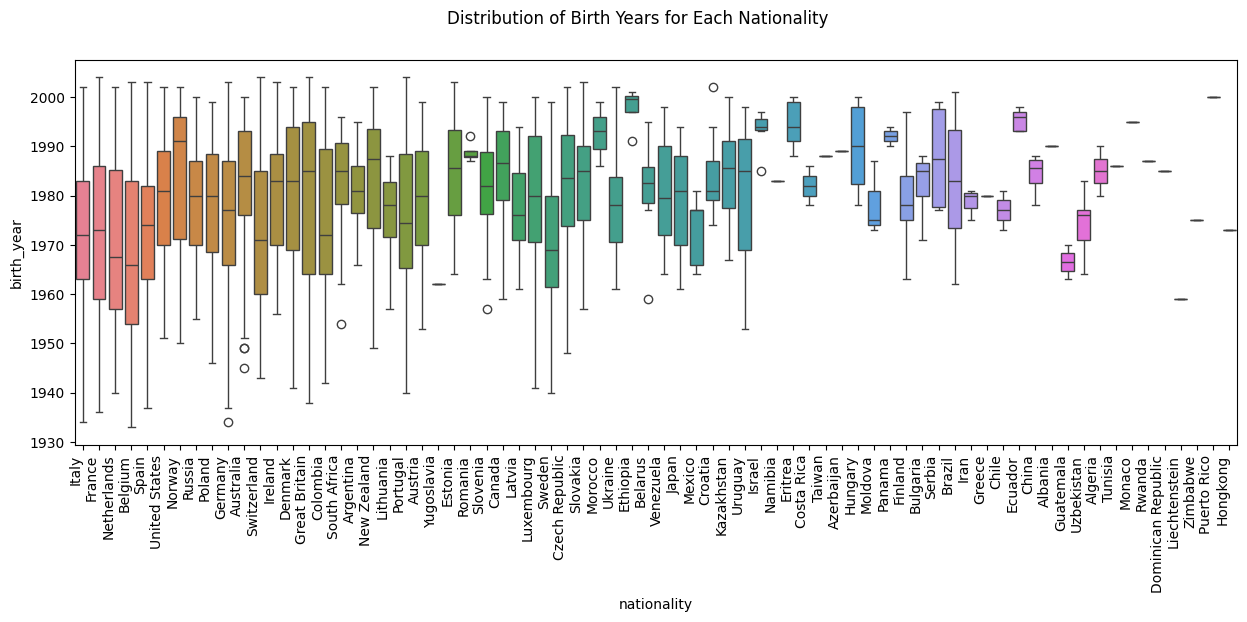

''

In [ ]:
# plot distribution of birth year for each nationality
plt.figure(figsize=(15, 5))
sns.boxplot(x="nationality", y="birth_year", data=cyclist_df, hue="nationality")
plt.xticks(rotation=90, ha="right")
plt.suptitle("Distribution of Birth Years for Each Nationality")
plt.legend([], [], frameon=False)
plt.show()

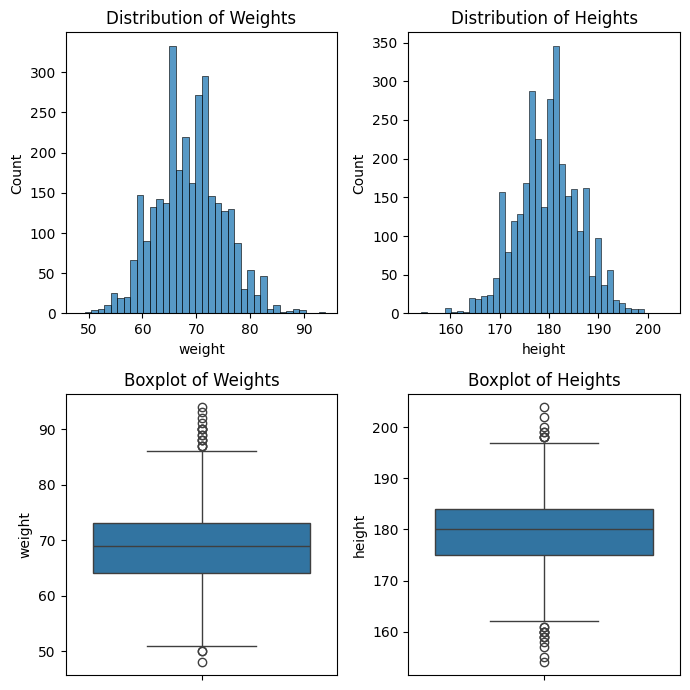

In [9]:
# plot of weith and height distribution
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
sns.histplot(cyclist_df.weight)
plt.title("Distribution of Weights")
plt.subplot(2, 2, 2)
sns.histplot(cyclist_df.height)
plt.title("Distribution of Heights")
plt.subplot(2, 2, 3)
sns.boxplot(y="weight", data=cyclist_df)
plt.title("Boxplot of Weights")
plt.subplot(2, 2, 4)
sns.boxplot(y="height", data=cyclist_df)
plt.title("Boxplot of Heights")
plt.tight_layout()
plt.show()

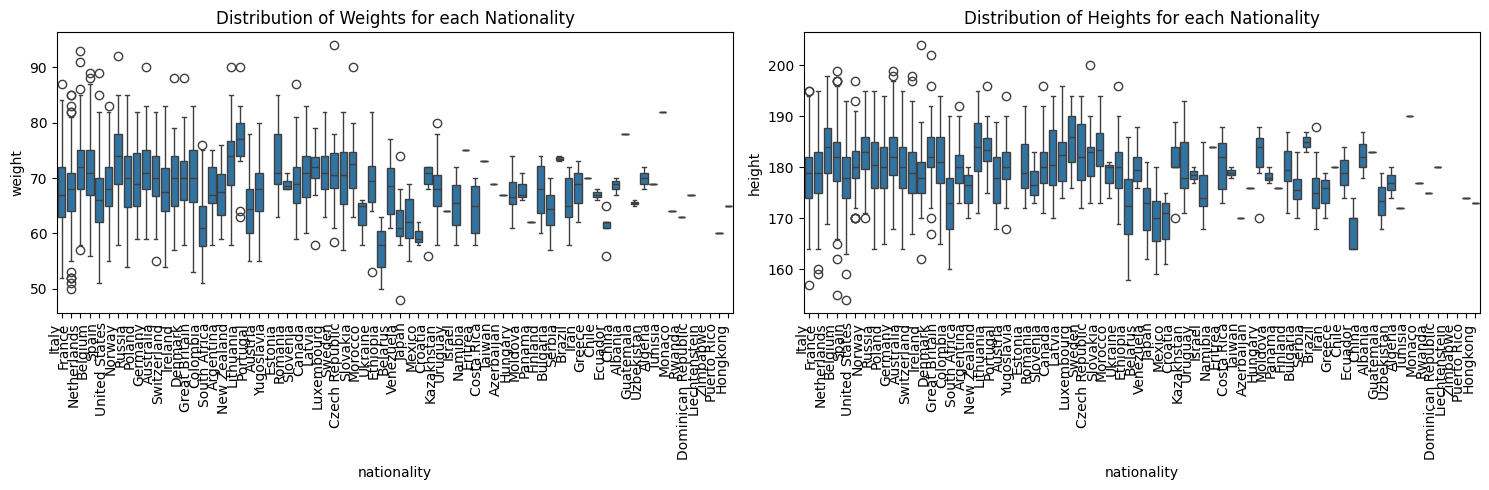

In [10]:
# distribution of weights and heights for each nationality
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="nationality", y="weight", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("Distribution of Weights for each Nationality")
plt.subplot(1, 2, 2)
sns.boxplot(x="nationality", y="height", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("Distribution of Heights for each Nationality")
plt.tight_layout()
plt.show()

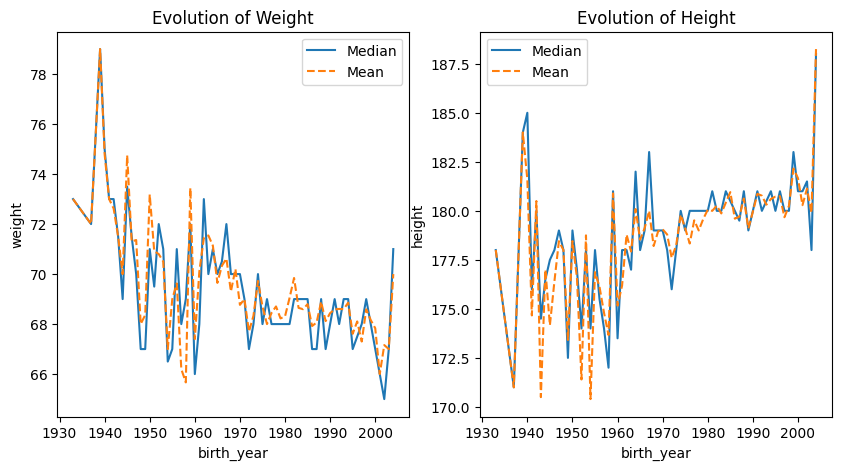

In [11]:
# trend of weight and height over the years
medians = cyclist_df.groupby("birth_year")[["height", "weight"]].median().reset_index()
means = cyclist_df.groupby("birth_year")[["height", "weight"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x="birth_year", y="weight", data=medians, label="Median", linestyle="-")
sns.lineplot(x="birth_year", y="weight", data=means, label="Mean", linestyle="--")
plt.title("Evolution of Weight")
plt.legend()
plt.subplot(1, 2, 2)
sns.lineplot(x="birth_year", y="height", data=medians, label="Median", linestyle="-")
sns.lineplot(x="birth_year", y="height", data=means, label="Mean", linestyle="--")
plt.title("Evolution of Height")
plt.legend()
plt.show()

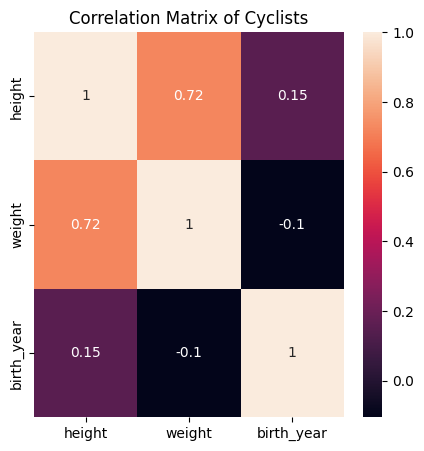

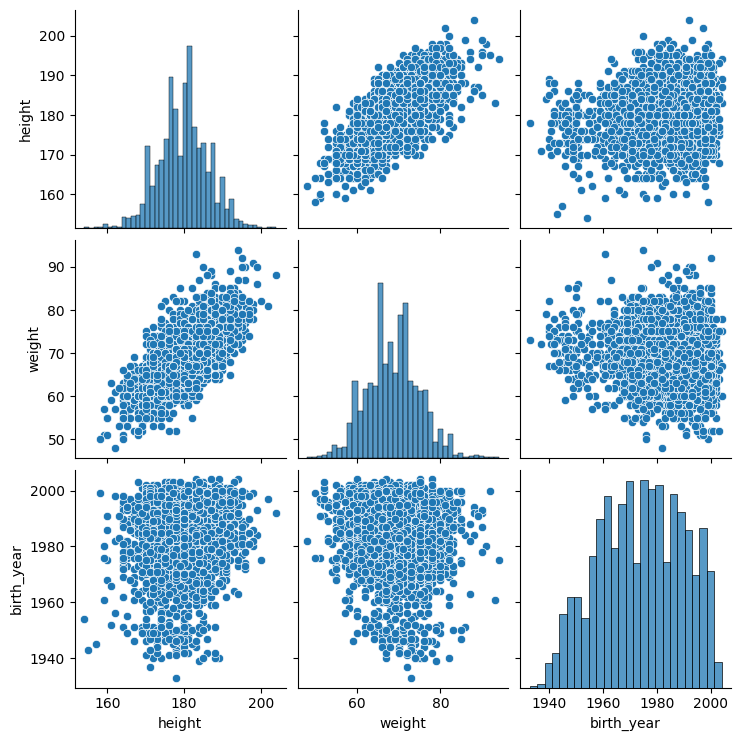

In [ ]:
# correlation matrix of cyclists
corr = cyclist_df[["height", "weight", "birth_year"]].corr(method="pearson")
plt.figure(figsize=(5, 5))
plt.title("Correlation Matrix of Cyclists")
sns.heatmap(corr, annot=True)
sns.pairplot(cyclist_df[["height", "weight", "birth_year"]])

## Races

In [18]:
races_df = pd.read_csv("./dataset/races.csv", parse_dates=["date"])
races_df["stage"] = races_df._url.str.split("/").str[-1]
races_df["race"] = races_df["name"]
races_df.drop(columns=["name"], inplace=True)
races_df["year"] = races_df["date"].dt.year
stages_df = races_df.groupby("_url")[
    [
        "_url",
        "stage",
        "race",
        "date",
        "points",
        "uci_points",
        "length",
        "climb_total",
        "profile",
        "startlist_quality",
        "is_tarmac",
        "year",
    ]
].first()

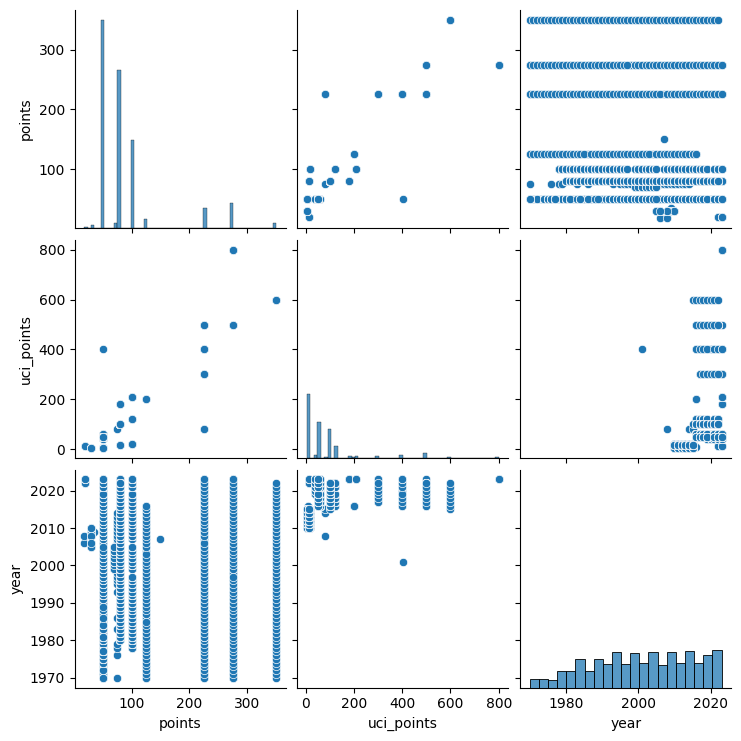

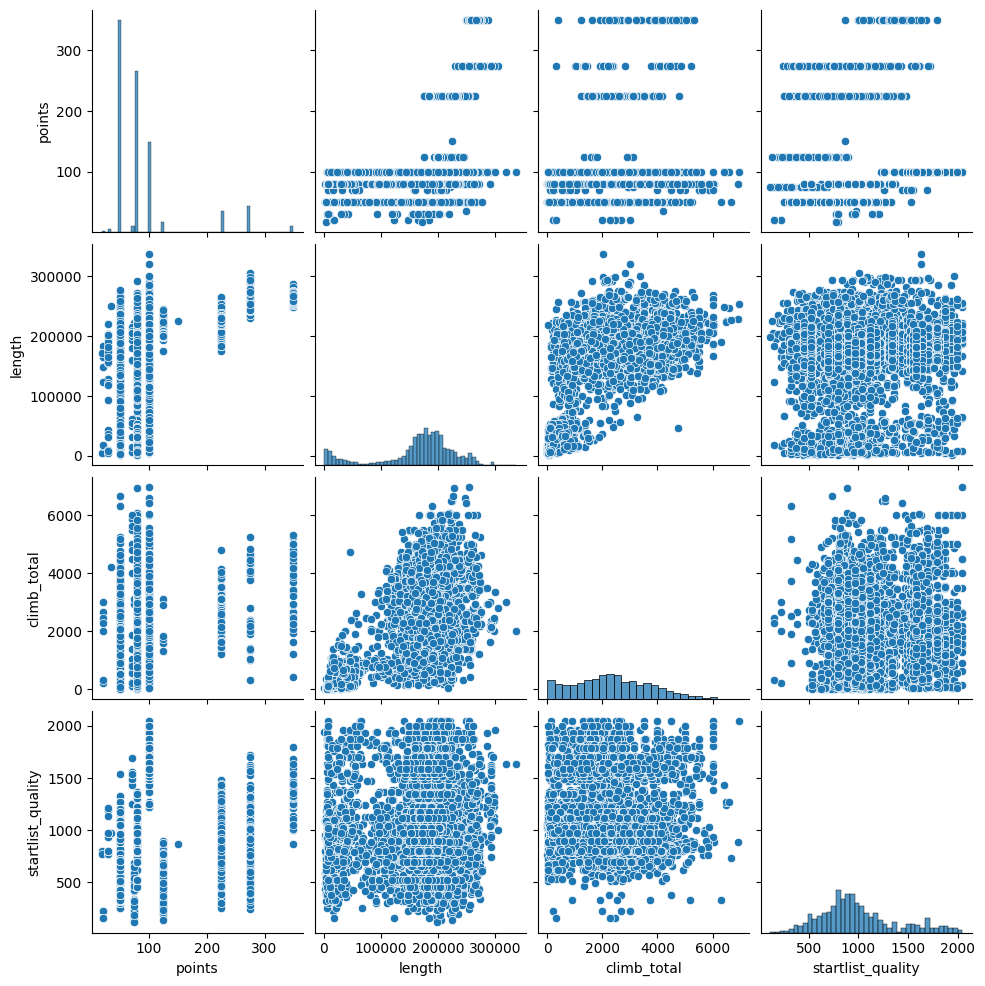

In [19]:
# show points and uci_points distribution
sns.pairplot(stages_df[["points", "uci_points", "year"]])
sns.pairplot(stages_df[["points", "length", "climb_total", "startlist_quality"]])